<a href="https://colab.research.google.com/github/adanny1278/adanny1278/blob/main/loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Challenge

<img src="https://imageio.forbes.com/specials-images/imageserve/5ecd179f798e4c00060d2c7c/0x0.jpg?format=jpg&height=600&width=1200&fit=bounds" width="500" height="300">

In the bustling city of Financia, the Central Lending Institution (CLI) is the largest provider of loans to individuals and businesses. With a mission to support economic growth and financial stability, CLI processes thousands of loan applications every month. However, the traditional manual review process is time-consuming and prone to human error, leading to delays and inconsistencies in loan approvals.
To address these challenges, CLI has decided to leverage the power of machine learning to streamline their loan approval process. They have compiled a comprehensive dataset containing historical loan application records, including various factors such as credit scores, income levels, employment status, loan terms(measured in years), loan amounts, asset values, and the final loan status (approved or denied).


**Your task is to develop a predictive model that can accurately determine the likelihood of loan approval based on the provided features. By doing so, you will help CLI make faster, more accurate, and fairer lending decisions, ultimately contributing to the financial well-being of the community.**

It is recommended that you follow the typical machine learning workflow, though you are not required to strictly follow each steps:
1. Data Collection: Gather the data you need for your model. (Already done for you)

2. Data Preprocessing: Clean and prepare the data for analysis. (Already done for you)

3. Exploratory Data Analysis (EDA): Understand the data and its patterns. (Partially done for you)

4. Feature Engineering: Create new features or modify existing ones to improve model performance. (Partially done for you)

5. Model Selection: Choose the appropriate machine learning algorithm.

6. Model Training: Train the model using the training dataset.

7. Model Evaluation: Evaluate the model's performance using a validation dataset.

8. Model Optimization: Optimize the model's parameters to improve performance.

9. Model Testing: Test the final model on a separate test dataset.

**Please include ALL your work and thought process in this notebook**

In [99]:
# You may include any package you deem fit. We sugggest looking into Scikit-learn
import pandas as bruh
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Dataset


In [100]:
# DO NOT MODIFY
loan_data = bruh.read_csv("/content/loan_approval.csv")


## EDA
Uncomment to see desired output. Add more analysis if you like

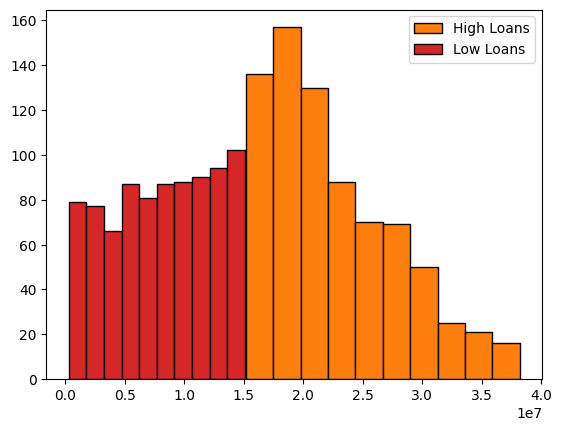

High loan:  loan_status
Approved    1277
Rejected     762
Name: count, dtype: int64 

Low loan:  loan_status
Approved    1379
Rejected     851
Name: count, dtype: int64


In [62]:

import matplotlib.pyplot as plt

# ------ Display basic information ------
# print(loan_data.columns)
# print(loan_data.describe())

# ------ Check for missing values ------
# print(loan_data.isnull().sum()) nice

# ------ Visualize the distribution of loan status ------
# loan_status_counts = loan_data['loan_status'].value_counts()
# plt.bar(loan_status_counts.index, loan_status_counts.values)
# plt.title('Distribution of Loan Status')
# plt.xlabel('Loan Status')
# plt.ylabel('Count')

# ------ Visualize the distribution of numerical features ------
# loan_data.hist(bins=30, figsize=(20, 15))

# ------ Correlation matrix ------
# corr_matrix = loan_data.select_dtypes(include=[float, int]).corr() had to add select dtypes lol
# fig, ax = plt.subplots(figsize=(10, 8))
# cax = ax.matshow(corr_matrix, cmap='coolwarm')
# fig.colorbar(cax)
# plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
# plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# ----- MORE (Encouraged but not required) ------
#There are sooo many connections I can make, so I'm gonna js do 4!
# ------ Visualize the distribution of loan status among Grads & Non-Grads ------

#find approvals and rejections data for grads
# loan_status_grad = loan_data[loan_data['education'] == "Graduate"]['loan_status'].value_counts()
# plt.bar(["Grads approved", "Grads denied"], loan_status_grad.values)
# plt.title('Distribution of Grads')


# #find approvals and rejections data for non grads
# loan_status_nonG = loan_data[loan_data['education'] != "Graduate"]['loan_status'].value_counts()
# plt.bar(["No Grad approve", "No Grad deny"], loan_status_nonG.values) #weird words to fit the space lol

# #plot x and y labels
# plt.xlabel('Loan Status')
# plt.ylabel('Count')


#Does a larger income mean more likely to be approved?

# avg_income = loan_data['income_annum'].mean()

# high_income = loan_data[bruh.to_numeric(loan_data['income_annum']) >= avg_income]['loan_status'].value_counts()
# low_income = loan_data[bruh.to_numeric(loan_data['income_annum']) <= avg_income]['loan_status'].value_counts()

# --------------------- Looks to be about the same -----------------------
#plt.pie(high_income.values, labels = high_income.index, shadow = True)
#plt.pie(low_income.values, labels = low_income.index, shadow = True)


#Same thing but maybe bank assets have more pull?

# avg_asset = loan_data['bank_asset_value'].mean()

# high_assets = loan_data[bruh.to_numeric(loan_data['bank_asset_value']) >= avg_income]['loan_status'].value_counts()
# low_assets = loan_data[bruh.to_numeric(loan_data['bank_asset_value']) <= avg_income]['loan_status'].value_counts()

#--------------------- Looks to be about the same -----------------------
#plt.pie(high_assets.values, labels = high_assets.index, shadow = True)
#plt.pie(low_assets.values, labels = low_assets.index, shadow = True)


#Alrigh last one - loan amount correspoonding to higher approval?

# avg_loan_amt = loan_data['loan_amount'].mean()

# high_loan = loan_data[bruh.to_numeric(loan_data['loan_amount']) >= avg_loan_amt] #group all loans that were above the mean loan amt
# high_approved = high_loan[high_loan['loan_status'] == "Approved"]["loan_amount"] #show all loans above mean that were approved
# high_rejected = high_loan[high_loan['loan_status'] == "Rejected"]["loan_amount"] #show all loans above mean that were rejected

# low_loan = loan_data[bruh.to_numeric(loan_data['loan_amount']) <= avg_loan_amt] #group all loans that were below the mean loan amt
# low_approved = low_loan[low_loan['loan_status'] == "Approved"]["loan_amount"] #show all loans below mean that were approved
# low_rejected = low_loan[low_loan['loan_status'] == "Rejected"]["loan_amount"] #show all loans below mean that were rejected

#plot a histogram of high & low approved loans
# plt.hist(high_approved)
# plt.hist(high_approved, label='High Loans', edgecolor='black')
# plt.hist(low_approved)
# plt.hist(low_approved, label='Low Loans', edgecolor='black')
# plt.legend()
# plt.show()

#plot a histogram of high & low rejected loans
# plt.hist(high_rejected)
# plt.hist(high_rejected, label='High Loans', edgecolor='black')
# plt.hist(low_rejected)
# plt.hist(low_rejected, label='Low Loans', edgecolor='black')
# plt.legend()
# plt.show()

#just for ease sake, show how many loans were approved/rejected
# print("High loan: ", loan_data[bruh.to_numeric(loan_data['loan_amount']) >= avg_loan_amt]["loan_status"].value_counts(), "\n")
# print("Low loan: ", loan_data[bruh.to_numeric(loan_data['loan_amount']) <= avg_loan_amt]["loan_status"].value_counts())
#Low Approval & Rejection is fairly consistent
#High Approval & Rejection cluster around 20 Million

## Feature Engineering

You may want to convert categorical variables to numerical. For example, education takes on the value Graduate and Not Graduate. But we want it to be 0 or 1 for machine learning algorithms to use.

In [102]:

loan_data['education'] = loan_data['education'].map({'Graduate': 1, 'Not Graduate': 0})
loan_data['self_employed'] = loan_data['self_employed'].map({'Yes': 1, 'No': 0})
loan_data['loan_status'] = loan_data['loan_status'].replace({'Approved': 1, 'Rejected': 0})


## Model Selection

You are free to use any classification machine learning models you like: Logistic Regression, Decision Trees/Random Forests, Support Vector Machines, KNN ...

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Model Training and Evaluation

In [112]:
X = loan_data.iloc[:,1:11]
y = loan_data.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# classify = ('Gradient Boosting')
# y_pos = np.arange(len(classify))
model = GradientBoostingClassifier()  # For regression, use GradientBoostingRegressor()
model.fit(X_train, y_train)
# score = []
# classyfy = GradientBoostingClassifier()
# scores = cross_val_score(classyfy, x, y,cv=5)
# score.append(scores.mean())
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('The accuration of classification is ', accuracy*100) #pretty good!

The accuration of classification is  97.73614363778297


## Model Optimization and Testing

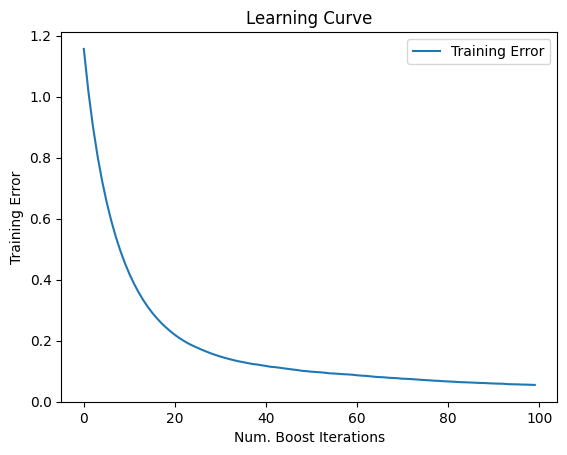

In [116]:
plt.plot(model.train_score_, label='Training Error')
plt.xlabel('Num. Boost Iterations')
plt.ylabel('Training Error')
plt.title('Learning Curve')
plt.legend()
plt.show()
